### - Sobhan Moradian Daghigh
#### - 11/10/2021
#### 
#### - ML - EX01 - Q1
##### 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

#### Reading the dataset

In [2]:
dataset = pd.read_csv('./ML-HW01/dataset1/dataset1.csv')
dataset.head()

,x,y
0,0.097627,0.626964
1,0.430379,0.846452
2,0.205527,0.756017
3,0.089766,0.427504
4,-0.152690,-1.335228


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    float64
 1   y       300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


#### Part A:

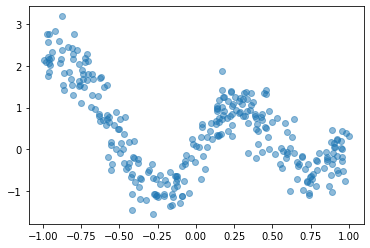

In [4]:
plt.scatter(dataset.iloc[:, 0], dataset.iloc[:, 1], alpha= 0.5)
plt.show()

#### Part G:

#### To solve a polynomial regression as a linear regression problem, update the dataset as below:
##### h(x) = θ0 + ... + θi(x^i) + ... θd(x^d)   --->    h(x) = θ0 + ... + θi(xi) + ... θd(xd)

In [5]:
df = pd.DataFrame()
labels = ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']

for i in range(11):
    df[labels[i]] = np.power(dataset.iloc[:,0], i)
    
df['y'] = dataset.iloc[:, 1]

df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,1.0,0.097627,0.009531,0.000930,0.000091,0.000009,8.658046e-07,8.452591e-08,8.252012e-09,8.056192e-10,7.865019e-11,0.626964
1,1.0,0.430379,0.185226,0.079717,0.034309,0.014766,6.354843e-03,2.734989e-03,1.177081e-03,5.065907e-04,2.180259e-04,0.846452
2,1.0,0.205527,0.042241,0.008682,0.001784,0.000367,7.537202e-05,1.549097e-05,3.183808e-06,6.543577e-07,1.344880e-07,0.756017
3,1.0,0.089766,0.008058,0.000723,0.000065,0.000006,5.232170e-07,4.696729e-08,4.216083e-09,3.784624e-10,3.397320e-11,0.427504
4,1.0,-0.152690,0.023314,-0.003560,0.000544,-0.000083,1.267274e-05,-1.935005e-06,2.954567e-07,-4.511341e-08,6.888384e-09,-1.335228


#### Split data into 80% of train and 20% of test.

In [6]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], train_size=0.8, shuffle=True)

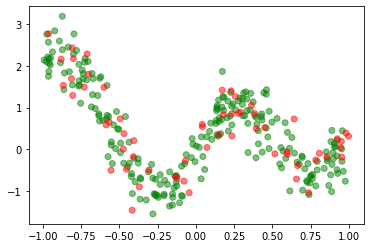

In [113]:
plt.scatter(x_train.iloc[:, 1], y_train.iloc[:,], alpha= 0.5, c=['green'] * x_train.shape[0])
plt.scatter(x_test.iloc[:, 1], y_test.iloc[:,], alpha= 0.5, c=['red'] * x_test.shape[0])
plt.show()

In [116]:
train = pd.concat([x_train, y_train], axis=1)
test = pd.concat([x_test, y_test], axis=1)

#### Ok we're not allowded to use build-in funcs for Gradient Descent.
#### So let's define it according to the algorithm.

In [104]:
# Data count
m = train.shape[0]

In [105]:
def gd(epoch, degree, df_train, df_test, size, alpha, decay, report=True):
    
    # Coefficients
    coeffs = [0] * (degree + 1)
    
    alph = alpha
    
    # Miss rate - Learning rate - Epoch
    mr_lr_ep = [[[[], [], []], [[], [], []]], [], [], []]
    
    predY = predY_cal(coeffs, df_train, degree)
    for i in range(epoch):
        coeffs, step_size = update_coefficients(coeffs, alpha, size, predY, df_train, degree)
        predY = predY_cal(coeffs, df_train, degree)
        
        if report:
            miss_rate(df_train, df_test, predY, coeffs, degree, mr_lr_ep)
            mr_lr_ep[1].append(step_size)
            mr_lr_ep[2].append(i)
        
        alpha = np.multiply(alph, np.divide(1, np.add(1, np.multiply(decay, i))))
                
    return coeffs, mr_lr_ep

#### The func which updates the coefficients.

In [20]:
def update_coefficients(coeffs, alpha, m, predY, df, degree):
    for i in range(degree + 1):
        step_size = np.multiply(alpha, np.multiply(np.divide(1, m), sum(np.multiply(np.subtract(predY, df.iloc[:, -1]), df.iloc[:, i]))))
        coeffs[i] -= step_size
    
    return coeffs, step_size    

#### The func which calculate the prediction values.

In [12]:
def predY_cal(coeffs, df, degree):
    sum_ = 0
    for i in range(degree + 1):
        sum_ += np.multiply(coeffs[i], df.iloc[:, i])
        
    return sum_

#### The func which calculate miss-rates for the final reports.

In [13]:
def miss_rate(df_train, df_test, train_pred_Y, coeffs, degree, mr_lr_ep):
        
    tr_MSE = mean_squared_error(df_train.iloc[:, -1], train_pred_Y)
    tr_RMSE = mean_squared_error(df_train.iloc[:, -1], train_pred_Y, squared=False)
    tr_MAE = mean_absolute_error(df_train.iloc[:, -1], train_pred_Y)
    
    test_pred_Y = predY_cal(coeffs, df_test, degree=degree)
    ts_MSE = mean_squared_error(df_test.iloc[:, -1], test_pred_Y)
    ts_RMSE = mean_squared_error(df_test.iloc[:, -1], test_pred_Y, squared=False)
    ts_MAE = mean_absolute_error(df_test.iloc[:, -1], test_pred_Y)
    
    mr_lr_ep[0][0][0].append(tr_MSE)
    mr_lr_ep[0][0][1].append(tr_RMSE)
    mr_lr_ep[0][0][2].append(tr_MAE)
    
    mr_lr_ep[0][1][0].append(ts_MSE)
    mr_lr_ep[0][1][1].append(ts_RMSE)
    mr_lr_ep[0][1][2].append(ts_MAE)
        

#### OK, let's blow it up:)

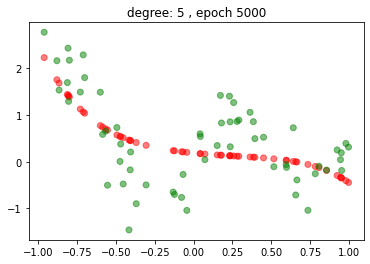


           MSE: 0.53 , RMSE: 0.73 , MAE: 0.60




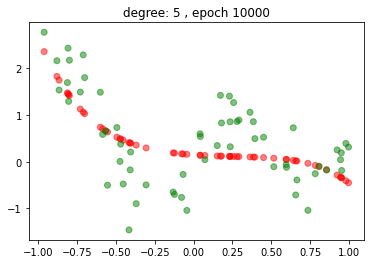


           MSE: 0.51 , RMSE: 0.71 , MAE: 0.59




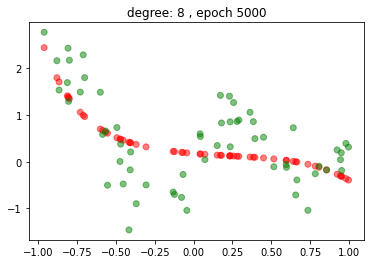


           MSE: 0.52 , RMSE: 0.72 , MAE: 0.59




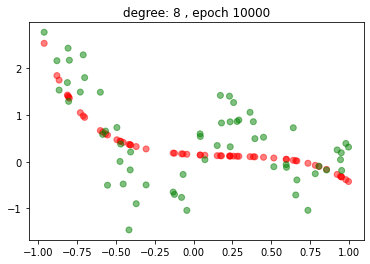


           MSE: 0.51 , RMSE: 0.71 , MAE: 0.58




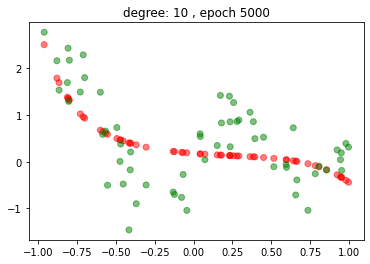


           MSE: 0.52 , RMSE: 0.72 , MAE: 0.59




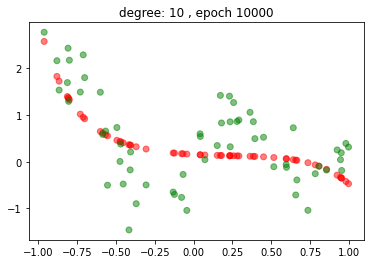


           MSE: 0.51 , RMSE: 0.72 , MAE: 0.59




In [117]:
degrees = [5, 8, 10]
epochs = [5000, 10000]
mr_lr_ep_list = []

for degree in degrees:
    for epoch in epochs:
        # According to some searches, I decided to start learning rate from 0.003 and decrease it during iterations
        coeffs, mr_lr_ep = gd(epoch=epoch, degree=degree, df_train=train, df_test=test, size=m, alpha=0.003, decay=0.0005)
        mr_lr_ep_list.append([mr_lr_ep, degree])
        prediction = predY_cal(coeffs, test, degree=degree)
        
        plt.scatter(x_test.iloc[:, 1], prediction, alpha= 0.5, c=['red'] * x_test.shape[0])
        plt.scatter(x_test.iloc[:, 1], y_test, alpha= 0.5, c=['green'] * x_test.shape[0])
        plt.title('degree: {} , epoch {}'.format(degree, epoch))
        plt.show()
        
        MSE = mean_squared_error(y_test, prediction)
        RMSE = mean_squared_error(y_test, prediction, squared=False)
        MAE = mean_absolute_error(y_test, prediction)
        
        print('\n           MSE: {:.2f} , RMSE: {:.2f} , MAE: {:.2f}\n\n'.format(MSE, RMSE, MAE))        

#### Part D

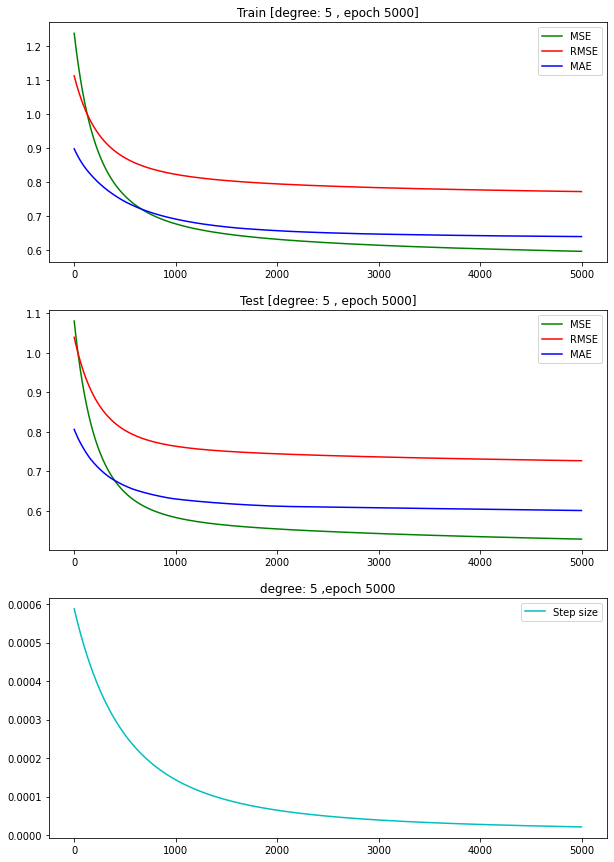

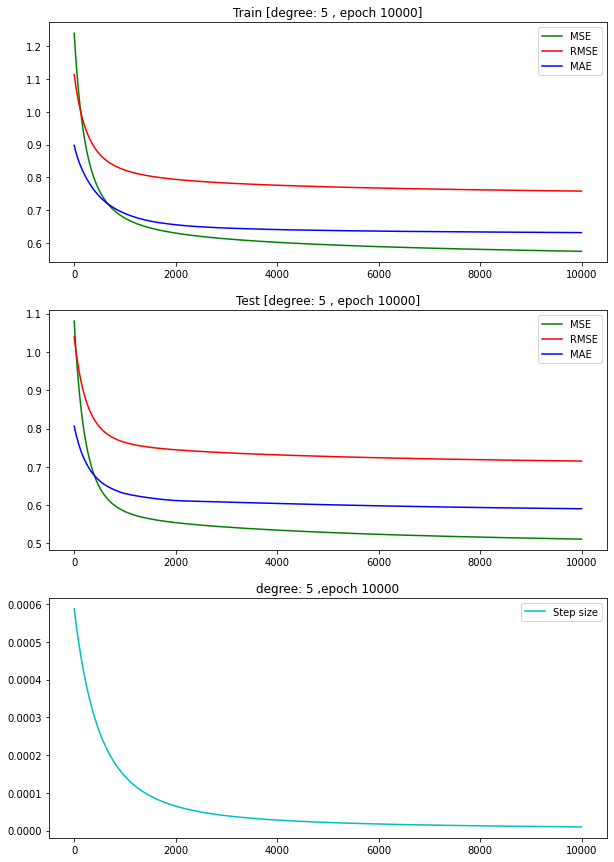

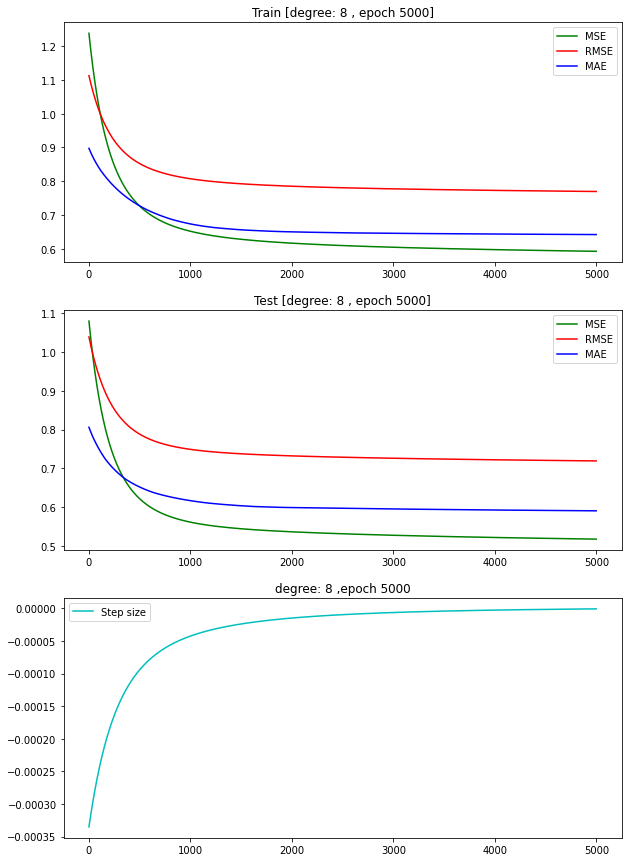

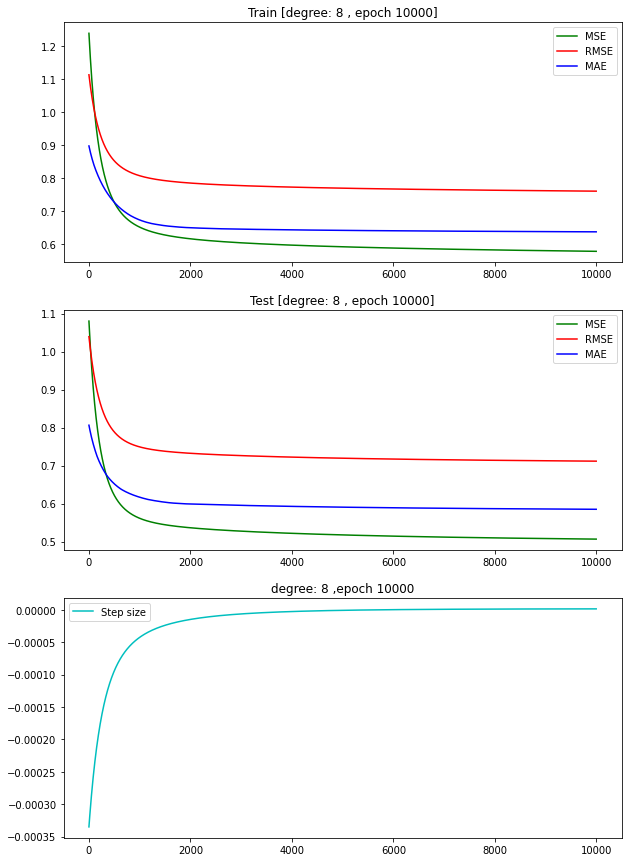

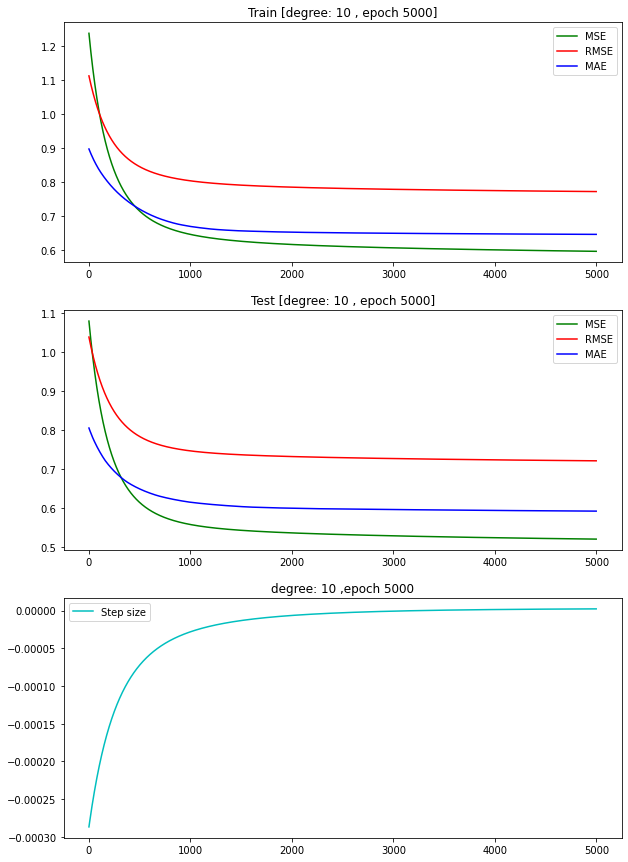

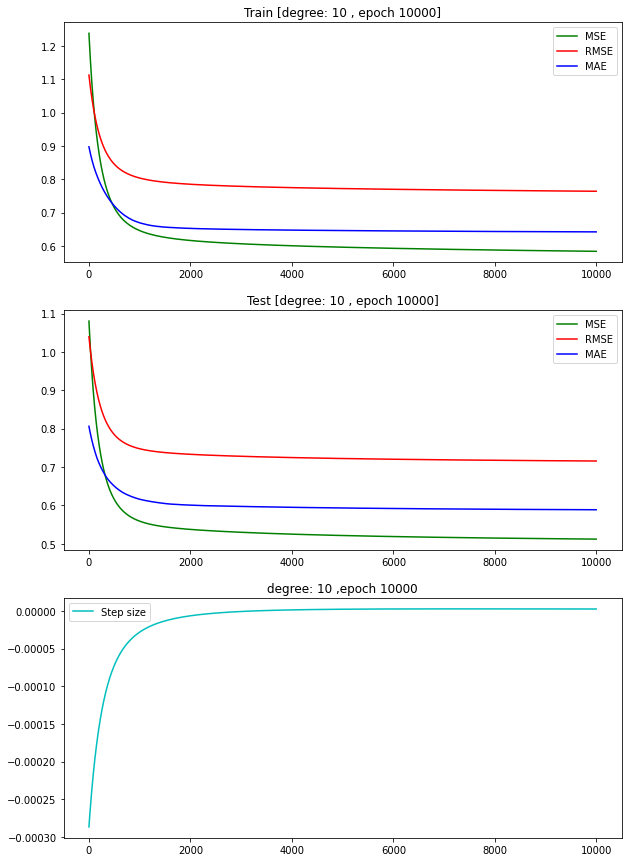

In [118]:
for ele in mr_lr_ep_list:
    fig, axs = plt.subplots(3, figsize=(10, 15))

    axs[0].set_title('Train [degree: {} , epoch {}]'.format(ele[1], len(ele[0][2])))
    axs[0].plot(ele[0][2], ele[0][0][0][0], 'g', label='MSE')
    axs[0].plot(ele[0][2], ele[0][0][0][1], 'r', label='RMSE')
    axs[0].plot(ele[0][2], ele[0][0][0][2], 'b', label='MAE')
    axs[0].legend()        
    
    axs[1].set_title('Test [degree: {} , epoch {}]'.format(ele[1], len(ele[0][2])))
    axs[1].plot(ele[0][2], ele[0][0][1][0], 'g', label='MSE')
    axs[1].plot(ele[0][2], ele[0][0][1][1], 'r', label='RMSE')
    axs[1].plot(ele[0][2], ele[0][0][1][2], 'b', label='MAE')
    axs[1].legend()         
    
    axs[2].set_title('degree: {} ,epoch {}'.format(ele[1], len(ele[0][2])))
    axs[2].plot(ele[0][2], ele[0][1], 'c', label='Step size')
    axs[2].legend()


In [16]:
...

Ellipsis

#### Part H:

#### Normal Equation

In [17]:
def ne(df_train, df_test, degree):
    X = df_train.iloc[:, :degree + 1]
    y = df_train.iloc[:, -1:]
    
    coeffs = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
    pred_Y = predY_cal(coeffs, df_test, degree)
    
    plt.scatter(df_test.iloc[:, 1], pred_Y, alpha= 0.5, c=['red'] * df_test.shape[0])
    plt.scatter(df_test.iloc[:, 1], df_test.iloc[:, -1:], alpha= 0.5, c=['green'] * df_test.shape[0])
    plt.title('degree: {} '.format(degree))
    plt.show()
    
    MSE = mean_squared_error(df_test.iloc[:, -1:], pred_Y)
    RMSE = mean_squared_error(df_test.iloc[:, -1:], pred_Y, squared=False)
    MAE = mean_absolute_error(df_test.iloc[:, -1:], pred_Y)
    
    print('\n           MSE: {:.2f} , RMSE: {:.2f} , MAE: {:.2f}\n\n'.format(MSE, RMSE, MAE))

#### Here we go

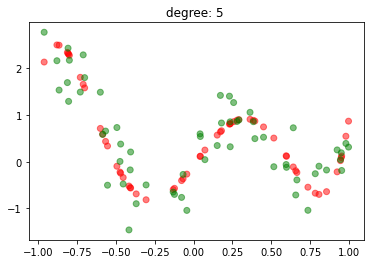


           MSE: 0.23 , RMSE: 0.48 , MAE: 0.39




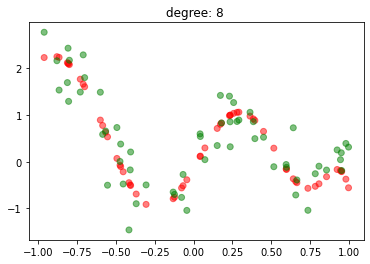


           MSE: 0.21 , RMSE: 0.45 , MAE: 0.37




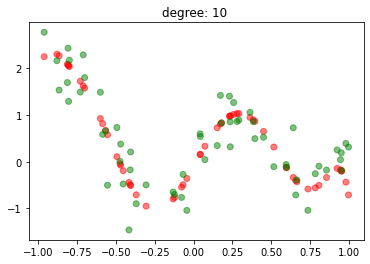


           MSE: 0.21 , RMSE: 0.46 , MAE: 0.37




In [18]:
for degree in degrees:
    ne(train, test, degree=degree)

#### Part V

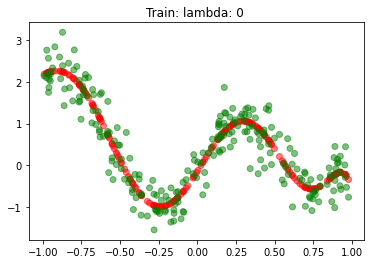

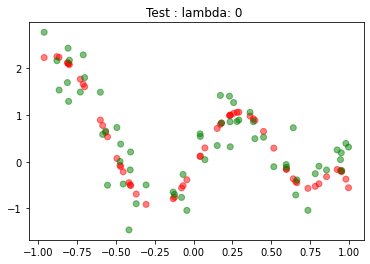


           train RMSE: 0.38 , test RMSE: 0.45 




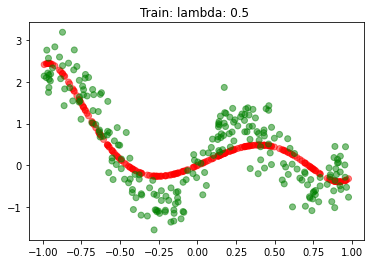

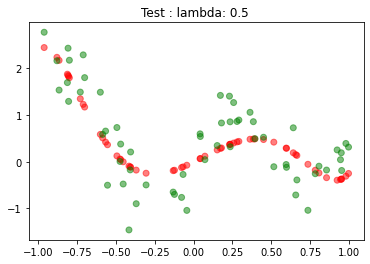


           train RMSE: 0.57 , test RMSE: 0.57 




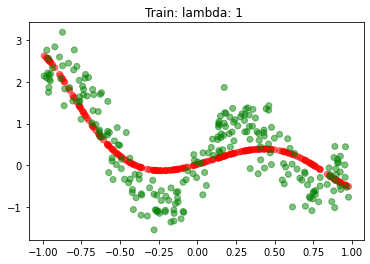

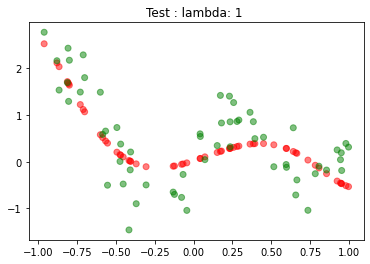


           train RMSE: 0.63 , test RMSE: 0.62 




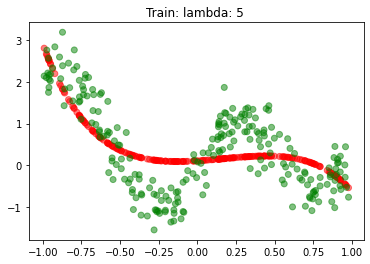

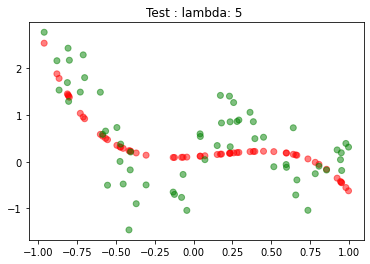


           train RMSE: 0.72 , test RMSE: 0.69 




In [19]:
degree = 8
lambdas = [0, 0.5, 1, 5]

for lambda_ in lambdas:
    
    i_matrix = np.identity(degree + 1)
    i_matrix[0][0] = 0
    
    X = train.iloc[:, :degree + 1]
    y = train.iloc[:, -1:]

    coeffs = np.dot(np.linalg.inv(np.add(np.dot(X.T, X), np.multiply(lambda_, i_matrix))), np.dot(X.T, y))
    train_pred_Y = predY_cal(coeffs, train, degree)
    test_pred_Y = predY_cal(coeffs, test, degree)

    plt.scatter(train.iloc[:, 1], train_pred_Y, alpha= 0.5, c=['red'] * train.shape[0])
    plt.scatter(train.iloc[:, 1], train.iloc[:, -1:], alpha= 0.5, c=['green'] * train.shape[0])
    plt.title('Train: lambda: {} '.format(lambda_))
    plt.show()
    
    plt.scatter(test.iloc[:, 1], test_pred_Y, alpha= 0.5, c=['red'] * test.shape[0])
    plt.scatter(test.iloc[:, 1], test.iloc[:, -1:], alpha= 0.5, c=['green'] * test.shape[0])
    plt.title('Test : lambda: {} '.format(lambda_))
    plt.show()
    
    train_RMSE = mean_squared_error(train.iloc[:, -1:], train_pred_Y, squared=False)
    test_RMSE = mean_squared_error(test.iloc[:, -1:], test_pred_Y, squared=False)
                    
    
    print('\n           train RMSE: {:.2f} , test RMSE: {:.2f} \n\n'.format(train_RMSE, test_RMSE))

#### Finito ;)